In [ ]:
import json
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def json_to_lists(json_file):
  with open(json_file) as f:
    data = json.load(f)
  dates = []
  neg_scores = []
  pos_scores = []
  volumes = []
  for document in data:
    date, time = document["key_as_string"].split("T")
    year, month, day = date.split("-")
    time = time.split(".")[0]
    hour, min, sec = time.split(":")
    date = datetime.datetime(int(year), int(month), int(day), int(hour), int(min))
    dates.append(date)
    neg_scores.append(document["average_negative_score"]["value"])
    pos_scores.append(document["average_positive_score"]["value"])
    volumes.append(document["doc_count"])
  return dates, neg_scores, pos_scores, volumes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

SCORES_FIGUERES_PATH = '/content/drive/My Drive/Naveler/03.TECH/data_discovery/datasets/555.json'
SCORES_CHAVES_PATH = '/content/drive/My Drive/Naveler/03.TECH/data_discovery/datasets/609.json'

figueres_dates, figueres_negative_scores, figueres_positive_scores, figueres_volumes = json_to_lists(SCORES_FIGUERES_PATH)
chaves_dates, chaves_negative_scores, chaves_positive_scores, chaves_volumes = json_to_lists(SCORES_CHAVES_PATH)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(f'Figueres: {len(figueres_dates)}')
print(f'Chaves: {len(chaves_dates)}')

Figueres: 1214
Chaves: 1192


In [ ]:
delta_t = 7

Figueres

In [ ]:
figueres_reduced_dates = []
figueres_reduced_neg_scores = []
figueres_reduced_pos_scores = []
figueres_reduced_volumes = []
year0 = figueres_dates[0].year
month0 = figueres_dates[0].month
day0 = figueres_dates[0].day
date0 = datetime.datetime(year0, month0, day0)
neg_prov = 0
pos_prov = 0
vol_prov = 0
count = 0
for i, date in enumerate(figueres_dates):
  dif = date - date0
  if dif.days < delta_t:
    neg_prov += figueres_negative_scores[i]
    pos_prov += figueres_positive_scores[i]
    vol_prov += figueres_volumes[i]
    count += 1
  else:
    #add values
    figueres_reduced_dates.append(date0)
    figueres_reduced_neg_scores.append(neg_prov/count)
    figueres_reduced_pos_scores.append(pos_prov/count)
    figueres_reduced_volumes.append(vol_prov)
    #reset parameters
    date0 = datetime.datetime(date.year, date.month, date.day)
    neg_prov = figueres_negative_scores[i]
    pos_prov = figueres_positive_scores[i]
    vol_prov = figueres_volumes[i]
    count = 1
#final addition
figueres_reduced_dates.append(date0)
figueres_reduced_neg_scores.append(neg_prov/count)
figueres_reduced_pos_scores.append(pos_prov/count)
figueres_reduced_volumes.append(vol_prov)

In [ ]:
figueres_reduced_scores = np.array(figueres_reduced_pos_scores) - np.array(figueres_reduced_neg_scores)

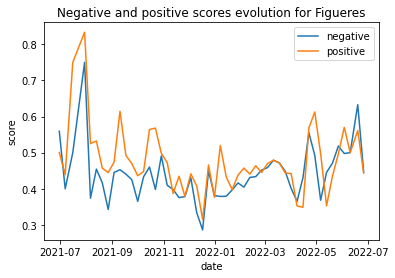

In [ ]:
plt.plot(figueres_reduced_dates, figueres_reduced_neg_scores, figueres_reduced_dates, figueres_reduced_pos_scores)
plt.title("Negative and positive scores evolution for Figueres")
plt.xlabel("date")
plt.ylabel("score")
plt.legend(["negative", "positive"])
plt.show()

Chaves

In [ ]:
chaves_reduced_dates = []
chaves_reduced_neg_scores = []
chaves_reduced_pos_scores = []
chaves_reduced_volumes = []
year0 = chaves_dates[0].year
month0 = chaves_dates[0].month
day0 = chaves_dates[0].day
date0 = datetime.datetime(year0, month0, day0)
neg_prov = 0
pos_prov = 0
vol_prov = 0
count = 0
for i, date in enumerate(chaves_dates):
  dif = date - date0
  if dif.days < delta_t:
    neg_prov += chaves_negative_scores[i]
    pos_prov += chaves_positive_scores[i]
    vol_prov += chaves_volumes[i]
    count += 1
  else:
    #add values
    chaves_reduced_dates.append(date0)
    chaves_reduced_neg_scores.append(neg_prov/count)
    chaves_reduced_pos_scores.append(pos_prov/count)
    chaves_reduced_volumes.append(vol_prov)
    #reset parameters
    date0 = datetime.datetime(date.year, date.month, date.day)
    neg_prov = chaves_negative_scores[i]
    pos_prov = chaves_positive_scores[i]
    vol_prov = chaves_volumes[i]
    count = 1
#final addition
chaves_reduced_dates.append(date0)
chaves_reduced_neg_scores.append(neg_prov/count)
chaves_reduced_pos_scores.append(pos_prov/count)
chaves_reduced_volumes.append(vol_prov)

In [ ]:
chaves_reduced_scores = np.array(chaves_reduced_pos_scores) - np.array(chaves_reduced_neg_scores)

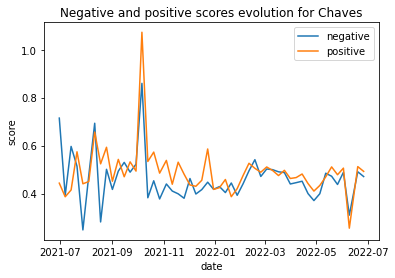

In [ ]:
plt.plot(chaves_reduced_dates, chaves_reduced_neg_scores, chaves_reduced_dates, chaves_reduced_pos_scores)
plt.title("Negative and positive scores evolution for Chaves")
plt.xlabel("date")
plt.ylabel("score")
plt.legend(["negative", "positive"])
plt.show()

Comparison

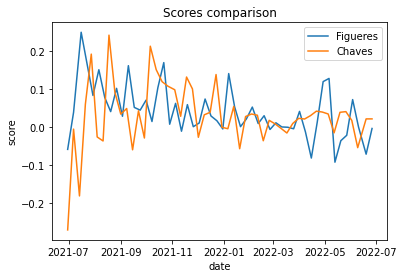

In [ ]:
plt.plot(figueres_reduced_dates, figueres_reduced_scores, chaves_reduced_dates, chaves_reduced_scores)
plt.title("Scores comparison")
plt.xlabel("date")
plt.ylabel("score")
plt.legend(["Figueres", "Chaves"])
plt.show()

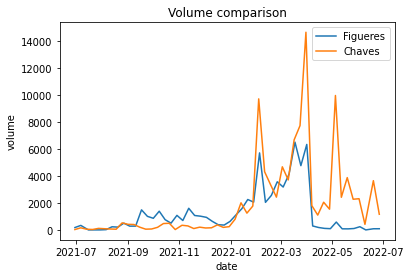

In [ ]:
plt.plot(figueres_reduced_dates, figueres_reduced_volumes, chaves_reduced_dates, chaves_reduced_volumes)
plt.title("Volume comparison")
plt.xlabel("date")
plt.ylabel("volume")
plt.legend(["Figueres", "Chaves"])
plt.show()